Importing necessary libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

Loading and Viewing data samples

In [159]:
country_data_url = 'https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv'
country_df = pd.read_csv(country_data_url)
data_dict_url = "https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv"
data_dict_df = pd.read_csv(data_dict_url)

In [160]:
country_df.head()
print(country_df.shape)

(167, 10)


In [161]:
data_dict_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


removing Country name column

In [162]:
df = country_df.drop(columns=['country'])

Applying Kmeans to fit all features

In [163]:
km=cluster.KMeans(n_clusters=3)
km.fit(df)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

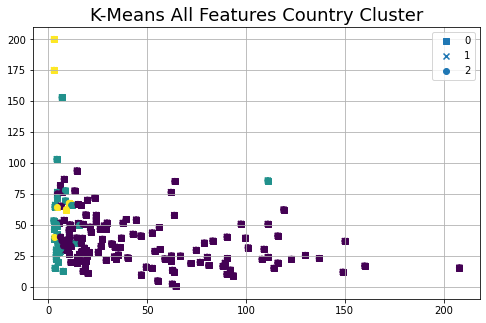

In [164]:
plt.figure(figsize=(8,5))
plt.title("K-Means All Features Country Cluster", fontsize=18)
plt.grid(True)

markers = ['s', 'x', 'o']
for l, m in zip(np.unique(km.labels_), markers):
    plt.scatter(df.iloc[:,0],df.iloc[:,1], c= km.labels_, label=l, marker=m)
    plt.legend()

Scaling data for PCA

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_std = sc.fit_transform(df)

Applying PCA on all features

In [166]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_std)
print(pca.explained_variance_ratio_)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Analysing feature contribution

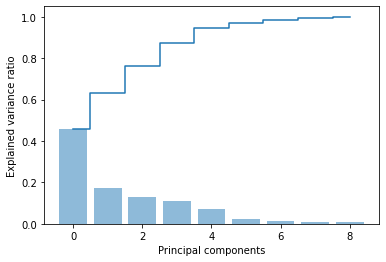

In [167]:
import matplotlib.pyplot as plt
pos = np.arange(len(pca.explained_variance_ratio_))
plt.bar(pos, list(pca.explained_variance_ratio_), alpha=0.5, align='center')
plt.step(pos, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_var.png', dpi=300)
plt.show()

Applying PCA for 2 best features

[0.4595174  0.17181626]


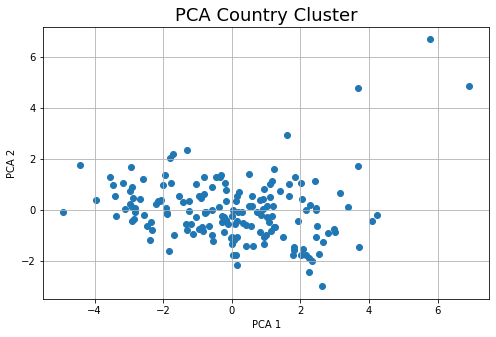

In [168]:
pca = PCA(n_components=2)
pca.fit(df_std)
print(pca.explained_variance_ratio_)
df_pca = pca.transform(df_std)

plt.figure(figsize=(8,5))
plt.title("PCA Country Cluster", fontsize=18)
plt.grid(True)
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

Applying K-Means on PCA best features

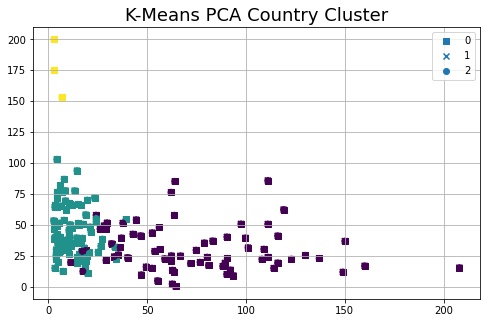

In [169]:
km=cluster.KMeans(n_clusters=3)
km.fit(df_pca[:,:3])
country_df['Pred Label']=km.labels_

plt.figure(figsize=(8,5))
plt.title("K-Means PCA Country Cluster", fontsize=18)
plt.grid(True)

markers = ['s', 'x', 'o']
for l, m in zip(np.unique(km.labels_), markers):
    plt.scatter(df.iloc[:,0],df.iloc[:,1], c= km.labels_, label=l, marker=m)
    plt.legend()

Adding K-Means Predicted label for unsupervised data

In [170]:
country_df['Pred Label'] = country_df['Pred Label'].map({0:'under-developing country',
                                                         1:'developing country', 
                                                         2:'developed country'})

In [171]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Pred Label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,under-developing country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,under-developing country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing country
